In [46]:
# Base python 3.9.12
import os.path as pth
import matplotlib.pyplot as plt # Matplotlib v3.5.1
import mat73 as mtb # Mat73 v0.59
import numpy as np # Numpy v1.23.4
import os
import json
import h5py

import matplotlib as mpt
from cycler import cycler

mpt.rcParams['lines.linewidth'] = 1.4
mpt.rcParams['font.size'] = 12
mpt.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])
plt.style.use('default')

def set_my_layout(ax: plt.Axes, xlabel: str, ylabel: str, title: str=None, legend_loc=(0.01,0.01), set_legend=True) -> plt.Axes:
    if title != None:
        ax.set_title(title, fontdict={'color': 'black', 'size': 14})
    ax.set_xlabel(xlabel, fontdict={'color': 'black', 'size': 14})
    ax.set_ylabel(ylabel, fontdict={'color': 'black', 'size': 14})
    ax.tick_params(axis='y', colors='black', labelsize=14)
    ax.tick_params(axis='x', colors='black', labelsize=14)
    if set_legend:
        ax.legend(prop={'size': 12}, loc=legend_loc)
    # ax.xaxis.major.formatter._useMathText = True
    return ax

In [47]:
# Delete all models except RNN v1 (v1) and CNN v2 (v10)

# for (dir, folder, files) in os.walk(os.path.join("ML models", "models")):
#     for file in files:
#         if file.split(".")[-1] in ["xlsx", "csv"]:
#             os.remove(os.path.join(dir, file))


In [48]:
# Read json files containing information about the clusters

with open('clusters_informations_for_hybrid_simulations.json') as json_file:
    clusters_infos =  json.load(json_file)

In [49]:
full_network_physical_file_path = os.path.join('ARTICLE_hybrid_results',
                                               'new_simulation_data_original_step_tss_dhn1.mat')

# full_network_physical_dict = mtb.loadmat(full_network_physical_file_path)
full_network_physical_dict = h5py.File(full_network_physical_file_path, 'r')

reduced_hybrids_rnns_dicts = {}
reduced_hybrids_cnns_dicts = {}
external_pipes_identifiers = {}
remixing_nodes = {}

for cluster_key in ["a", "b", "d", "e", "f", "g", "i", "m"]:
    reduced_file_path_rnn = os.path.join('ARTICLE_hybrid_results',
                                      f'hybrid_cluster_{cluster_key}_step_tss_rnn.mat')
    reduced_file_path_cnn = os.path.join('ARTICLE_hybrid_results',
                                      f'hybrid_cluster_{cluster_key}_step_tss_cnn.mat')
    
    # reduced_hybrids_rnns_dicts[cluster_key] = mtb.loadmat(reduced_file_path_rnn)
    f = h5py.File(reduced_file_path_rnn, 'r')
    reduced_hybrids_rnns_dicts[cluster_key] = f
    # reduced_hybrids_cnns_dicts[cluster_key] = mtb.loadmat(reduced_file_path_cnn)
    f = h5py.File(reduced_file_path_rnn, 'r')
    reduced_hybrids_cnns_dicts[cluster_key] = f
    
first_dynamic_step_interest = 1*60
total_dynamic_steps_horizon = 7*24*60 - 1

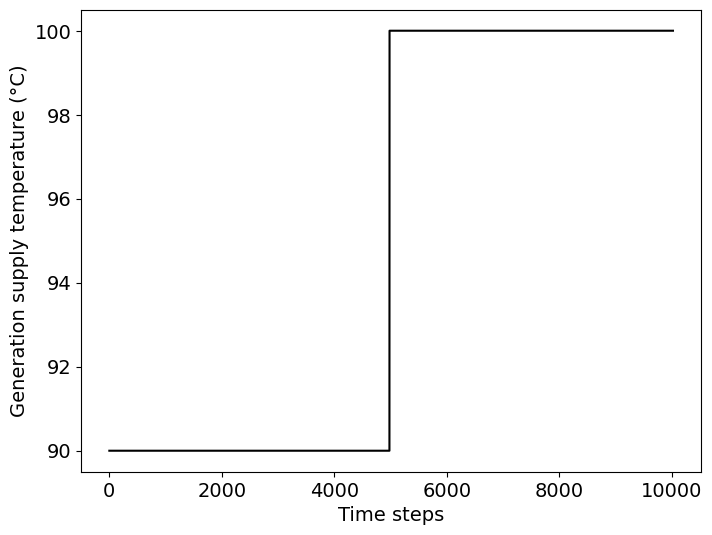

In [84]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(full_network_physical_dict['ts'][:,0], c='black')
# ax.plot(reduced_hybrids_rnns_dicts['a']['ts'][:,0], c='red')
set_my_layout(ax=ax, xlabel='Time steps', ylabel='Generation supply temperature (°C)',
              legend_loc=[0.8,0.8],
              set_legend=False)

# plt.legend(['Full', 'Reduced'])
plt.savefig(os.path.join('ARTICLE_images_plots', 'generation_supply_temperatures_step.svg'))
plt.show()


In [51]:
tr_sources_in_step_tss = {}
pw_sources_in_step_tss = {}

mean_flows_ingoing_clusters = {}
power_sources = {}

Mean mwf = 5.0512 Kg/s with std 0.7469
Adj node (RNN) = 0.0092 °C with std 0.0691
Adj node (CNN) = 0.0092 °C with std 0.0691
Loads relative (RNN) 0.1842 % with std 4.5640
Loads relative (CNN) 0.1842 % with std 4.5640


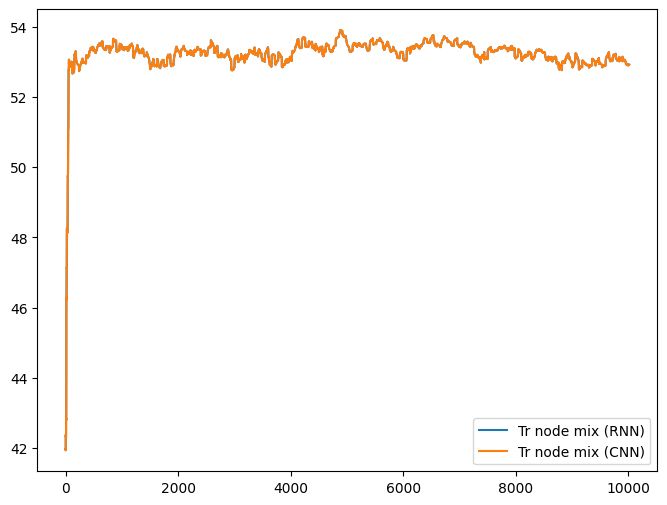

Source tr (RNN) = 0.0027 °C with std 0.0200
Source tr (CNN) = 0.0027 °C with std 0.0200


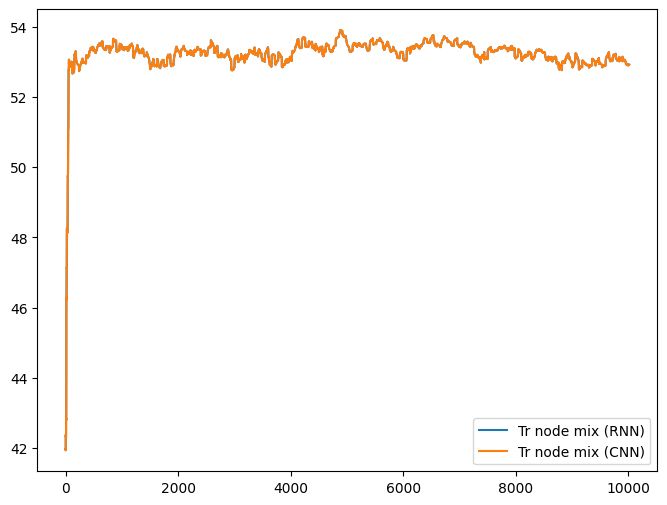

Power (RNN) = 0.0068 % with std 0.0491
Power (CNN) = 0.0068 % with std 0.0491


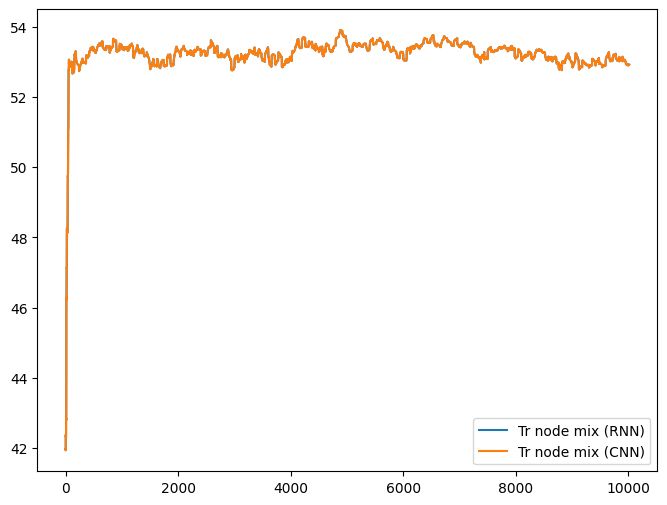

In [52]:
## Cluster a 

physicals = full_network_physical_dict
hybrids_cnns = reduced_hybrids_cnns_dicts['a']
hybrids_rnns = reduced_hybrids_rnns_dicts['a']

pipe_index = 18
mw = physicals['mw'][:,18]
or_node = 12
red_node = 12
tr_node_mix_rnn = hybrids_rnns['tr'][:,red_node]
tr_node_mix_cnn = hybrids_cnns['tr'][:,red_node]
physical_mix = physicals['tr'][:,or_node]
pw_in_rnn = mw*4200*(physicals['ts'][:,or_node] - tr_node_mix_rnn)
pw_in_cnn = mw*4200*(physicals['ts'][:,or_node] - tr_node_mix_cnn)
pw_in_phy = mw*4200*(physicals['ts'][:,or_node]- physical_mix)
print(f'Mean mwf = {np.mean(mw):.4f} Kg/s with std {np.std(mw):.4f}')
mean_flows_ingoing_clusters['a'] = np.mean(np.abs(mw))
print(f'Adj node (RNN) = {np.mean(np.abs(tr_node_mix_rnn-physical_mix)):.4f} °C with std {np.std(np.abs(tr_node_mix_rnn-physical_mix)):.4f}')
print(f'Adj node (CNN) = {np.mean(np.abs(tr_node_mix_cnn-physical_mix)):.4f} °C with std {np.std(np.abs(tr_node_mix_cnn-physical_mix)):.4f}')
print(f'Loads relative (RNN) {100*np.mean(np.abs(1 - pw_in_rnn/pw_in_phy)):.4f} % with std {100*np.std(np.abs(1 - pw_in_rnn/pw_in_phy)):.4f}') 
print(f'Loads relative (CNN) {100*np.mean(np.abs(1 - pw_in_cnn/pw_in_phy)):.4f} % with std {100*np.std(np.abs(1 - pw_in_cnn/pw_in_phy)):.4f}') 
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(tr_node_mix_rnn, label='Tr node mix (RNN)')
ax.plot(tr_node_mix_cnn, label='Tr node mix (CNN)')
ax.legend()
plt.show()
tr_node_source_rnn = hybrids_rnns['tr'][:,0]
tr_node_source_cnn = hybrids_cnns['tr'][:,0]
physical_source = physicals['tr'][:,0]
print(f'Source tr (RNN) = {np.mean(np.abs(tr_node_source_rnn-physical_source)):.4f} °C with std {np.std(np.abs(tr_node_source_rnn-physical_source)):.4f}')
print(f'Source tr (CNN) = {np.mean(np.abs(tr_node_source_cnn-physical_source)):.4f} °C with std {np.std(np.abs(tr_node_source_cnn-physical_source)):.4f}')
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(tr_node_mix_rnn, label='Tr node mix (RNN)')
ax.plot(tr_node_mix_cnn, label='Tr node mix (CNN)')
ax.legend()
plt.show()
pw_source_rnn = 1*4200*(physicals['ts'][:,0] - hybrids_rnns['tr'][:,0])
pw_source_cnn = 1*4200*(physicals['ts'][:,0] - hybrids_cnns['tr'][:,0])
pw_physical_source = 1*4200*(physicals['ts'][:,0] - physicals['tr'][:,0])
pw_sources_in_step_tss['a-rnn'] = pw_source_rnn
pw_sources_in_step_tss['a-cnn'] = pw_source_cnn
pw_sources_in_step_tss['phys'] = pw_physical_source
abs_error = np.abs(1-pw_source_rnn/pw_physical_source)*100
print(f'Power (RNN) = {np.mean(abs_error):.4f} % with std {np.std(abs_error):.4f}')
abs_error = np.abs(1-pw_source_cnn/pw_physical_source)*100
print(f'Power (CNN) = {np.mean(abs_error):.4f} % with std {np.std(abs_error):.4f}')
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(tr_node_mix_rnn, label='Tr node mix (RNN)')
ax.plot(tr_node_mix_cnn, label='Tr node mix (CNN)')
ax.legend()
plt.show()

Mean mwf = 12.2033 Kg/s with std 1.6644
Adj node (RNN) = 0.0392 °C with std 0.5072
Adj node (CNN) = 0.0392 °C with std 0.5072
Loads relative (RNN) 0.6864 % with std 14.9106
Loads relative (CNN) 0.6864 % with std 14.9106


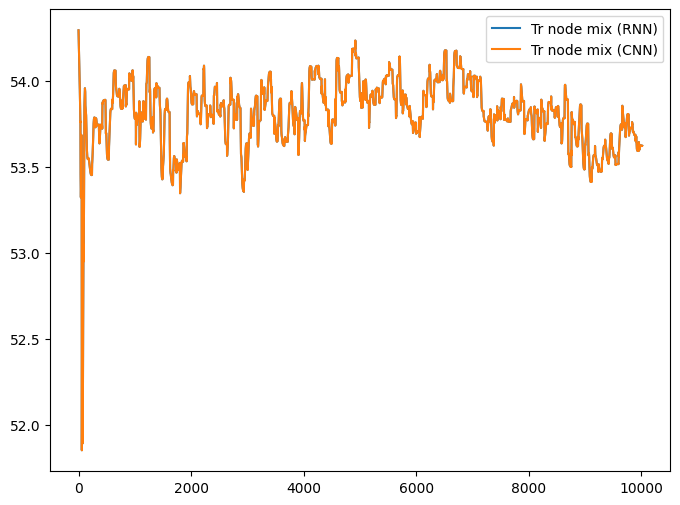

Source tr (RNN) = 0.0055 °C with std 0.0699
Source tr (CNN) = 0.0055 °C with std 0.0699


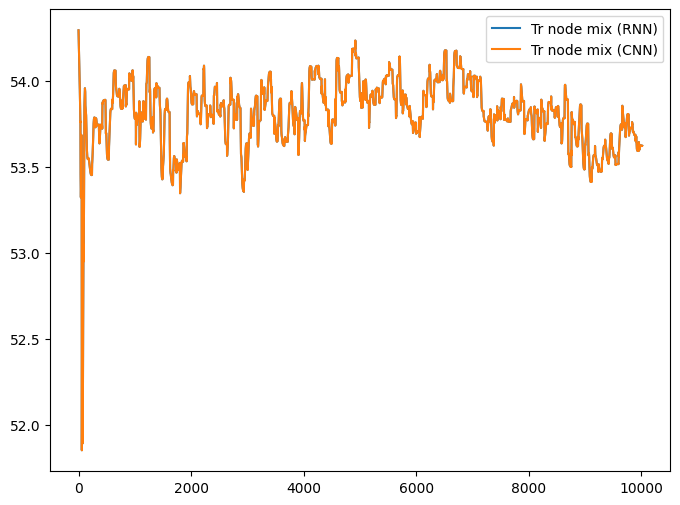

Power (RNN) = 0.0141 % with std 0.1763
Power (CNN) = 0.0141 % with std 0.1763


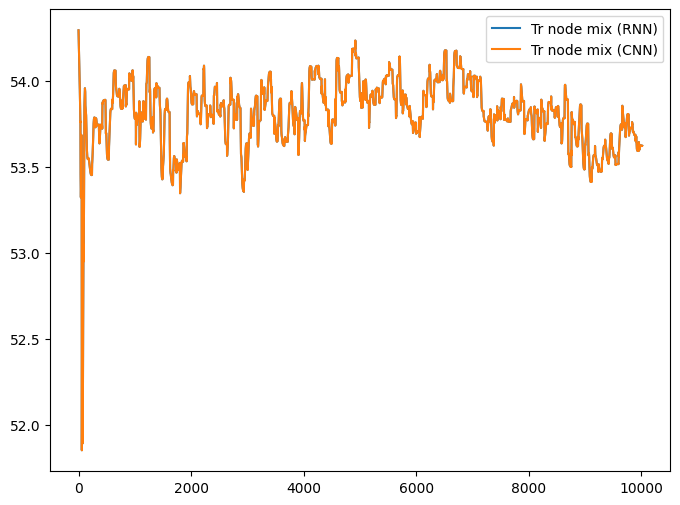

In [53]:
## Cluster b

physicals = full_network_physical_dict
hybrids_cnns = reduced_hybrids_cnns_dicts['b']
hybrids_rnns = reduced_hybrids_rnns_dicts['b']

pipe_index = 32
mw = physicals['mw'][:,pipe_index]
or_node = 24
red_node = 24
tr_node_mix_rnn = hybrids_rnns['tr'][:,red_node]
tr_node_mix_cnn = hybrids_cnns['tr'][:,red_node]
physical_mix = physicals['tr'][:,or_node]
pw_in_rnn = mw*4200*(physicals['ts'][:,or_node] - tr_node_mix_rnn)
pw_in_cnn = mw*4200*(physicals['ts'][:,or_node] - tr_node_mix_cnn)
pw_in_phy = mw*4200*(physicals['ts'][:,or_node]- physical_mix)
print(f'Mean mwf = {np.mean(mw):.4f} Kg/s with std {np.std(mw):.4f}')
mean_flows_ingoing_clusters['b'] = np.mean(np.abs(mw))
print(f'Adj node (RNN) = {np.mean(np.abs(tr_node_mix_rnn-physical_mix)):.4f} °C with std {np.std(np.abs(tr_node_mix_rnn-physical_mix)):.4f}')
print(f'Adj node (CNN) = {np.mean(np.abs(tr_node_mix_cnn-physical_mix)):.4f} °C with std {np.std(np.abs(tr_node_mix_cnn-physical_mix)):.4f}')
print(f'Loads relative (RNN) {100*np.mean(np.abs(1 - pw_in_rnn/pw_in_phy)):.4f} % with std {100*np.std(np.abs(1 - pw_in_rnn/pw_in_phy)):.4f}') 
print(f'Loads relative (CNN) {100*np.mean(np.abs(1 - pw_in_cnn/pw_in_phy)):.4f} % with std {100*np.std(np.abs(1 - pw_in_cnn/pw_in_phy)):.4f}') 
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(tr_node_mix_rnn, label='Tr node mix (RNN)')
ax.plot(tr_node_mix_cnn, label='Tr node mix (CNN)')
ax.legend()
plt.show()
tr_node_source_rnn = hybrids_rnns['tr'][:,0]
tr_node_source_cnn = hybrids_cnns['tr'][:,0]
physical_source = physicals['tr'][:,0]
print(f'Source tr (RNN) = {np.mean(np.abs(tr_node_source_rnn-physical_source)):.4f} °C with std {np.std(np.abs(tr_node_source_rnn-physical_source)):.4f}')
print(f'Source tr (CNN) = {np.mean(np.abs(tr_node_source_cnn-physical_source)):.4f} °C with std {np.std(np.abs(tr_node_source_cnn-physical_source)):.4f}')
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(tr_node_mix_rnn, label='Tr node mix (RNN)')
ax.plot(tr_node_mix_cnn, label='Tr node mix (CNN)')
ax.legend()
plt.show()
pw_source_rnn = 1*4200*(physicals['ts'][:,0] - hybrids_rnns['tr'][:,0])
pw_source_cnn = 1*4200*(physicals['ts'][:,0] - hybrids_cnns['tr'][:,0])
pw_physical_source = 1*4200*(physicals['ts'][:,0] - physicals['tr'][:,0])
abs_error = np.abs(1-pw_source_rnn/pw_physical_source)*100
print(f'Power (RNN) = {np.mean(abs_error):.4f} % with std {np.std(abs_error):.4f}')
abs_error = np.abs(1-pw_source_cnn/pw_physical_source)*100
print(f'Power (CNN) = {np.mean(abs_error):.4f} % with std {np.std(abs_error):.4f}')
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(tr_node_mix_rnn, label='Tr node mix (RNN)')
ax.plot(tr_node_mix_cnn, label='Tr node mix (CNN)')
ax.legend()
plt.show()
pw_sources_in_step_tss['b-rnn'] = pw_source_rnn
pw_sources_in_step_tss['b-cnn'] = pw_source_cnn
mean_flows_ingoing_clusters['b'] = np.mean(np.abs(mw))
# pw_sources_in_step_tss['phys'] = pw_physical_source

Mean mwf = 21.8044 Kg/s with std 2.9452
Adj node (RNN) = 0.0377 °C with std 0.3857
Adj node (CNN) = 0.0377 °C with std 0.3857
Loads relative (RNN) 1.1858 % with std 31.8973
Loads relative (CNN) 1.1858 % with std 31.8973


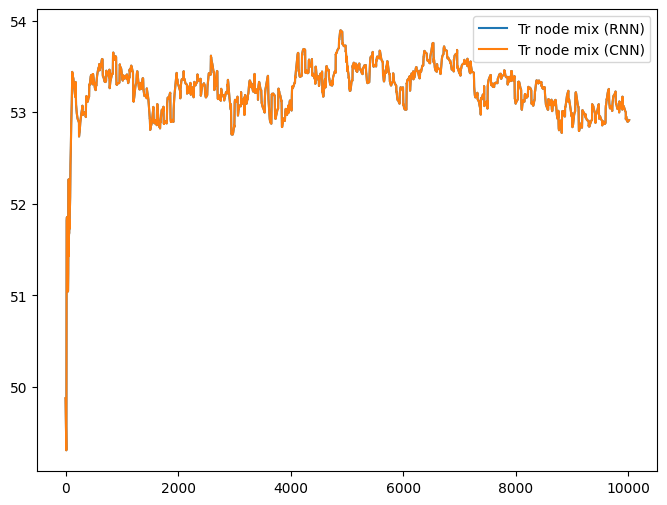

Source tr (RNN) = 0.0109 °C with std 0.1103
Source tr (CNN) = 0.0109 °C with std 0.1103


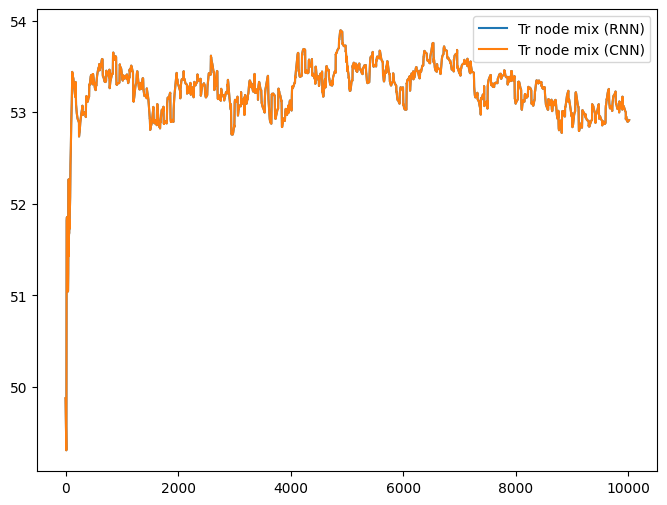

Power (RNN) = 0.0262 % with std 0.2532
Power (CNN) = 0.0262 % with std 0.2532


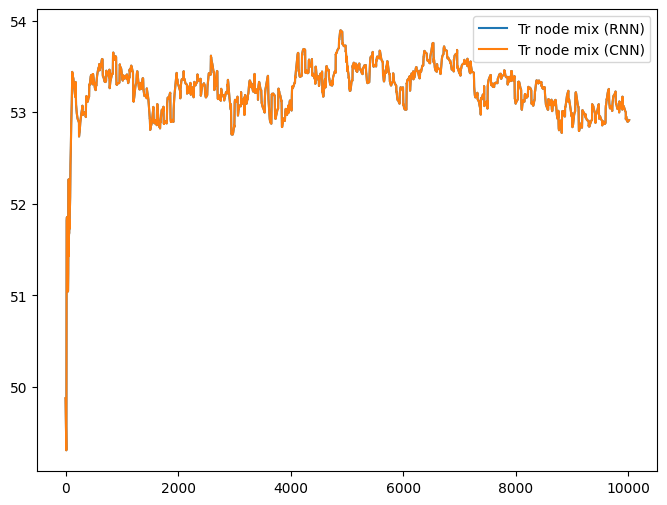

In [54]:
## Cluster d

physicals = full_network_physical_dict
hybrids_cnns = reduced_hybrids_cnns_dicts['d']
hybrids_rnns = reduced_hybrids_rnns_dicts['d']

pipe_index = 17
mw = physicals['mw'][:,pipe_index]
or_node = 12
red_node = 12
tr_node_mix_rnn = hybrids_rnns['tr'][:,red_node]
tr_node_mix_cnn = hybrids_cnns['tr'][:,red_node]
physical_mix = physicals['tr'][:,or_node]
pw_in_rnn = mw*4200*(physicals['ts'][:,or_node] - tr_node_mix_rnn)
pw_in_cnn = mw*4200*(physicals['ts'][:,or_node] - tr_node_mix_cnn)
pw_in_phy = mw*4200*(physicals['ts'][:,or_node]- physical_mix)
print(f'Mean mwf = {np.mean(mw):.4f} Kg/s with std {np.std(mw):.4f}')
# mean_flows_ingoing_clusters.append(np.mean(np.abs(mw)))
print(f'Adj node (RNN) = {np.mean(np.abs(tr_node_mix_rnn-physical_mix)):.4f} °C with std {np.std(np.abs(tr_node_mix_rnn-physical_mix)):.4f}')
print(f'Adj node (CNN) = {np.mean(np.abs(tr_node_mix_cnn-physical_mix)):.4f} °C with std {np.std(np.abs(tr_node_mix_cnn-physical_mix)):.4f}')
print(f'Loads relative (RNN) {100*np.mean(np.abs(1 - pw_in_rnn/pw_in_phy)):.4f} % with std {100*np.std(np.abs(1 - pw_in_rnn/pw_in_phy)):.4f}') 
print(f'Loads relative (CNN) {100*np.mean(np.abs(1 - pw_in_cnn/pw_in_phy)):.4f} % with std {100*np.std(np.abs(1 - pw_in_cnn/pw_in_phy)):.4f}') 
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(tr_node_mix_rnn, label='Tr node mix (RNN)')
ax.plot(tr_node_mix_cnn, label='Tr node mix (CNN)')
ax.legend()
plt.show()
tr_node_source_rnn = hybrids_rnns['tr'][:,0]
tr_node_source_cnn = hybrids_cnns['tr'][:,0]
physical_source = physicals['tr'][:,0]
print(f'Source tr (RNN) = {np.mean(np.abs(tr_node_source_rnn-physical_source)):.4f} °C with std {np.std(np.abs(tr_node_source_rnn-physical_source)):.4f}')
print(f'Source tr (CNN) = {np.mean(np.abs(tr_node_source_cnn-physical_source)):.4f} °C with std {np.std(np.abs(tr_node_source_cnn-physical_source)):.4f}')
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(tr_node_mix_rnn, label='Tr node mix (RNN)')
ax.plot(tr_node_mix_cnn, label='Tr node mix (CNN)')
ax.legend()
plt.show()
pw_source_rnn = 1*4200*(physicals['ts'][:,0] - hybrids_rnns['tr'][:,0])
pw_source_cnn = 1*4200*(physicals['ts'][:,0] - hybrids_cnns['tr'][:,0])
pw_physical_source = 1*4200*(physicals['ts'][:,0] - physicals['tr'][:,0])
abs_error = np.abs(1-pw_source_rnn/pw_physical_source)*100
print(f'Power (RNN) = {np.mean(abs_error):.4f} % with std {np.std(abs_error):.4f}')
abs_error = np.abs(1-pw_source_cnn/pw_physical_source)*100
print(f'Power (CNN) = {np.mean(abs_error):.4f} % with std {np.std(abs_error):.4f}')
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(tr_node_mix_rnn, label='Tr node mix (RNN)')
ax.plot(tr_node_mix_cnn, label='Tr node mix (CNN)')
ax.legend()
plt.show()
pw_sources_in_step_tss['d-rnn'] = pw_source_rnn
pw_sources_in_step_tss['d-cnn'] = pw_source_cnn
mean_flows_ingoing_clusters['d'] = np.mean(np.abs(mw))

Mean mwf = -36.3617 Kg/s with std 4.8728
Adj node (RNN) = 0.0261 °C with std 0.3005
Adj node (CNN) = 0.0261 °C with std 0.3005
Loads relative (RNN) 2.2431 % with std 89.7305
Loads relative (CNN) 2.2431 % with std 89.7305


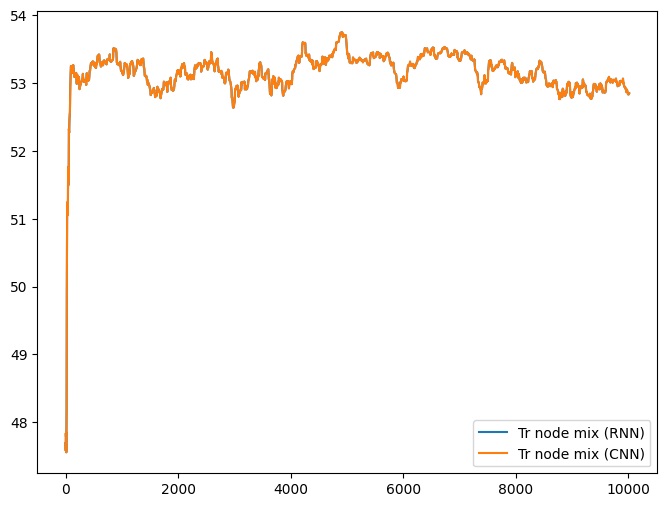

Source tr (RNN) = 0.0175 °C with std 0.2015
Source tr (CNN) = 0.0175 °C with std 0.2015


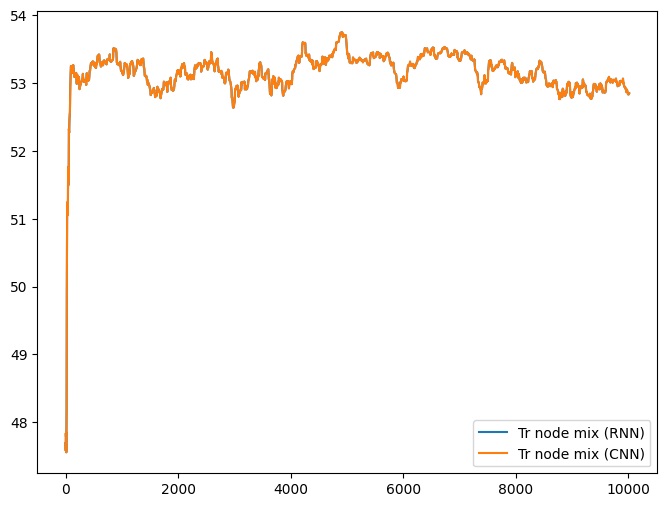

Power (RNN) = 0.0410 % with std 0.4452
Power (CNN) = 0.0410 % with std 0.4452


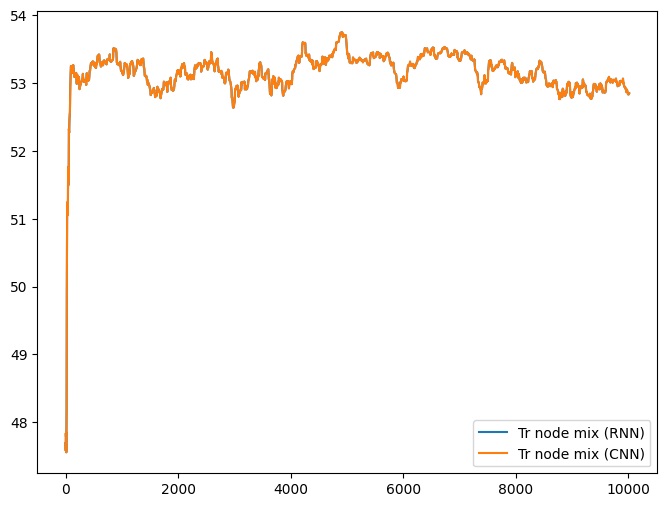

In [55]:
## Cluster e

physicals = full_network_physical_dict
hybrids_cnns = reduced_hybrids_cnns_dicts['e']
hybrids_rnns = reduced_hybrids_rnns_dicts['e']

pipe_index = 39
mw = physicals['mw'][:,pipe_index]
or_node = 53
red_node = 41
tr_node_mix_rnn = hybrids_rnns['tr'][:,red_node]
tr_node_mix_cnn = hybrids_cnns['tr'][:,red_node]
physical_mix = physicals['tr'][:,or_node]
pw_in_rnn = 1*4200*(physicals['ts'][:,or_node] - tr_node_mix_rnn)
pw_in_cnn = 1*4200*(physicals['ts'][:,or_node] - tr_node_mix_cnn)
pw_in_phy = 1*4200*(physicals['ts'][:,or_node]- physical_mix)
print(f'Mean mwf = {np.mean(mw):.4f} Kg/s with std {np.std(mw):.4f}')
# mean_flows_ingoing_clusters.append(np.mean(np.abs(mw)))
print(f'Adj node (RNN) = {np.mean(np.abs(tr_node_mix_rnn-physical_mix)):.4f} °C with std {np.std(np.abs(tr_node_mix_rnn-physical_mix)):.4f}')
print(f'Adj node (CNN) = {np.mean(np.abs(tr_node_mix_cnn-physical_mix)):.4f} °C with std {np.std(np.abs(tr_node_mix_cnn-physical_mix)):.4f}')
print(f'Loads relative (RNN) {100*np.mean(np.abs(1 - pw_in_rnn/pw_in_phy)):.4f} % with std {100*np.std(np.abs(1 - pw_in_rnn/pw_in_phy)):.4f}') 
print(f'Loads relative (CNN) {100*np.mean(np.abs(1 - pw_in_cnn/pw_in_phy)):.4f} % with std {100*np.std(np.abs(1 - pw_in_cnn/pw_in_phy)):.4f}') 
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(tr_node_mix_rnn, label='Tr node mix (RNN)')
ax.plot(tr_node_mix_cnn, label='Tr node mix (CNN)')
ax.legend()
plt.show()
tr_node_source_rnn = hybrids_rnns['tr'][:,0]
tr_node_source_cnn = hybrids_cnns['tr'][:,0]
physical_source = physicals['tr'][:,0]
print(f'Source tr (RNN) = {np.mean(np.abs(tr_node_source_rnn-physical_source)):.4f} °C with std {np.std(np.abs(tr_node_source_rnn-physical_source)):.4f}')
print(f'Source tr (CNN) = {np.mean(np.abs(tr_node_source_cnn-physical_source)):.4f} °C with std {np.std(np.abs(tr_node_source_cnn-physical_source)):.4f}')
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(tr_node_mix_rnn, label='Tr node mix (RNN)')
ax.plot(tr_node_mix_cnn, label='Tr node mix (CNN)')
ax.legend()
plt.show()
pw_source_rnn = 1*4200*(physicals['ts'][:,0] - hybrids_rnns['tr'][:,0])
pw_source_cnn = 1*4200*(physicals['ts'][:,0] - hybrids_cnns['tr'][:,0])
pw_physical_source = 1*4200*(physicals['ts'][:,0] - physicals['tr'][:,0])
abs_error = np.abs(1-pw_source_rnn/pw_physical_source)*100
print(f'Power (RNN) = {np.mean(abs_error):.4f} % with std {np.std(abs_error):.4f}')
abs_error = np.abs(1-pw_source_cnn/pw_physical_source)*100
print(f'Power (CNN) = {np.mean(abs_error):.4f} % with std {np.std(abs_error):.4f}')
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(tr_node_mix_rnn, label='Tr node mix (RNN)')
ax.plot(tr_node_mix_cnn, label='Tr node mix (CNN)')
ax.legend()
plt.show()
pw_sources_in_step_tss['e-rnn'] = pw_source_rnn
pw_sources_in_step_tss['e-cnn'] = pw_source_cnn
mean_flows_ingoing_clusters['e'] = np.mean(np.abs(mw))

Mean mwf = 73.0426 Kg/s with std 9.6465
Adj node (RNN) = 0.0396 °C with std 0.4083
Adj node (CNN) = 0.0396 °C with std 0.4083
Loads relative (RNN) 0.4420 % with std 22.7856
Loads relative (CNN) 0.4420 % with std 22.7856


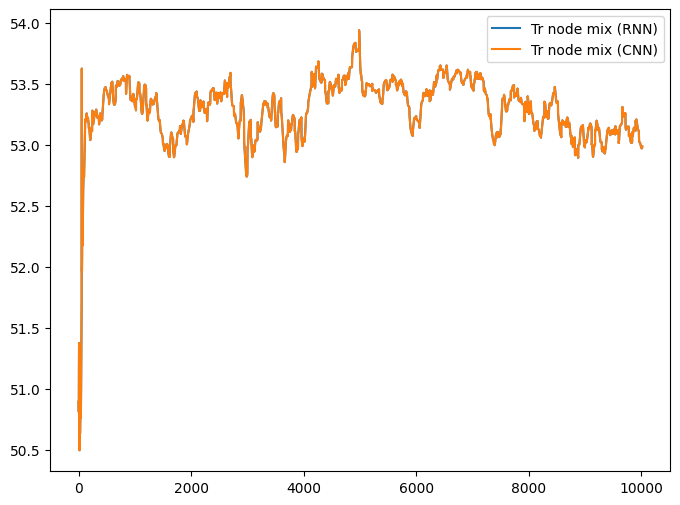

Source tr (RNN) = 0.0312 °C with std 0.3235
Source tr (CNN) = 0.0312 °C with std 0.3235


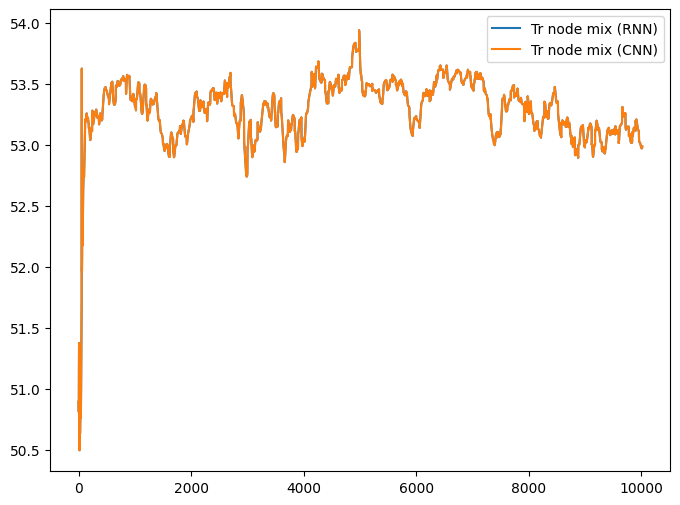

Power (RNN) = 0.0724 % with std 0.6996
Power (CNN) = 0.0724 % with std 0.6996


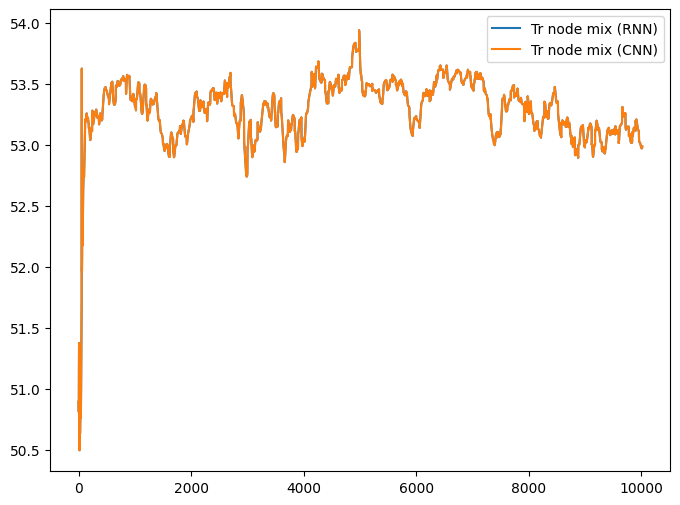

In [56]:
 ## Cluster f
 
physicals = full_network_physical_dict
hybrids_cnns = reduced_hybrids_cnns_dicts['f']
hybrids_rnns = reduced_hybrids_rnns_dicts['f']

pipe_index = 8
mw = physicals['mw'][:,pipe_index]
or_node = 5
red_node = 1
tr_node_mix_rnn = hybrids_rnns['tr'][:,red_node]
tr_node_mix_cnn = hybrids_cnns['tr'][:,red_node]
physical_mix = physicals['tr'][:,or_node]
pw_in_rnn = mw*4200*(physicals['ts'][:,or_node] - tr_node_mix_rnn)
pw_in_cnn = mw*4200*(physicals['ts'][:,or_node] - tr_node_mix_cnn)
pw_in_phy = mw*4200*(physicals['ts'][:,or_node]- physical_mix)
print(f'Mean mwf = {np.mean(mw):.4f} Kg/s with std {np.std(mw):.4f}')
# mean_flows_ingoing_clusters.append(np.mean(np.abs(mw)))
print(f'Adj node (RNN) = {np.mean(np.abs(tr_node_mix_rnn-physical_mix)):.4f} °C with std {np.std(np.abs(tr_node_mix_rnn-physical_mix)):.4f}')
print(f'Adj node (CNN) = {np.mean(np.abs(tr_node_mix_cnn-physical_mix)):.4f} °C with std {np.std(np.abs(tr_node_mix_cnn-physical_mix)):.4f}')
print(f'Loads relative (RNN) {100*np.mean(np.abs(1 - pw_in_rnn/pw_in_phy)):.4f} % with std {100*np.std(np.abs(1 - pw_in_rnn/pw_in_phy)):.4f}') 
print(f'Loads relative (CNN) {100*np.mean(np.abs(1 - pw_in_cnn/pw_in_phy)):.4f} % with std {100*np.std(np.abs(1 - pw_in_cnn/pw_in_phy)):.4f}') 
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(tr_node_mix_rnn, label='Tr node mix (RNN)')
ax.plot(tr_node_mix_cnn, label='Tr node mix (CNN)')
ax.legend()
plt.show()
tr_node_source_rnn = hybrids_rnns['tr'][:,0]
tr_node_source_cnn = hybrids_cnns['tr'][:,0]
physical_source = physicals['tr'][:,0]
print(f'Source tr (RNN) = {np.mean(np.abs(tr_node_source_rnn-physical_source)):.4f} °C with std {np.std(np.abs(tr_node_source_rnn-physical_source)):.4f}')
print(f'Source tr (CNN) = {np.mean(np.abs(tr_node_source_cnn-physical_source)):.4f} °C with std {np.std(np.abs(tr_node_source_cnn-physical_source)):.4f}')
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(tr_node_mix_rnn, label='Tr node mix (RNN)')
ax.plot(tr_node_mix_cnn, label='Tr node mix (CNN)')
ax.legend()
plt.show()
pw_source_rnn = 1*4200*(physicals['ts'][:,0] - hybrids_rnns['tr'][:,0])
pw_source_cnn = 1*4200*(physicals['ts'][:,0] - hybrids_cnns['tr'][:,0])
pw_physical_source = 1*4200*(physicals['ts'][:,0] - physicals['tr'][:,0])
abs_error = np.abs(1-pw_source_rnn/pw_physical_source)*100
print(f'Power (RNN) = {np.mean(abs_error):.4f} % with std {np.std(abs_error):.4f}')
abs_error = np.abs(1-pw_source_cnn/pw_physical_source)*100
print(f'Power (CNN) = {np.mean(abs_error):.4f} % with std {np.std(abs_error):.4f}')
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(tr_node_mix_rnn, label='Tr node mix (RNN)')
ax.plot(tr_node_mix_cnn, label='Tr node mix (CNN)')
ax.legend()
plt.show()
pw_sources_in_step_tss['f-rnn'] = pw_source_rnn
pw_sources_in_step_tss['f-cnn'] = pw_source_cnn
mean_flows_ingoing_clusters['f'] = np.mean(np.abs(mw))

In [57]:
pw_sources_in_step_tss

{'a-rnn': array([208933.54599048, 208220.45178549, 206424.76445293, ...,
        198217.01261641, 198216.38115333, 198215.96728558]),
 'a-cnn': array([208933.54599048, 208220.45178549, 206424.76445293, ...,
        198217.01261641, 198216.38115333, 198215.96728558]),
 'phys': array([208933.54599048, 208220.45178549, 206424.76445293, ...,
        198218.58229339, 198217.96449479, 198217.56468434]),
 'b-rnn': array([208933.54599048, 208220.45178549, 206424.76445293, ...,
        198213.85676023, 198210.69063   , 198207.71069702]),
 'b-cnn': array([208933.54599048, 208220.45178549, 206424.76445293, ...,
        198213.85676023, 198210.69063   , 198207.71069702]),
 'd-rnn': array([208933.54599048, 208220.45178549, 206424.76445293, ...,
        198213.30039315, 198210.80407887, 198208.7436373 ]),
 'd-cnn': array([208933.54599048, 208220.45178549, 206424.76445293, ...,
        198213.30039315, 198210.80407887, 198208.7436373 ]),
 'e-rnn': array([208933.54599048, 208220.45178549, 206424.76445

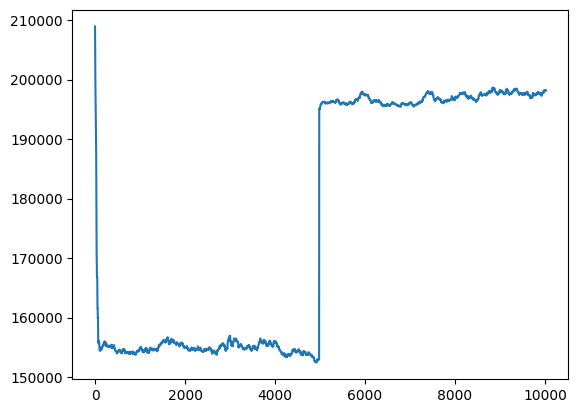

In [58]:
plt.plot(pw_sources_in_step_tss['phys'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C:\Users\d22rodri\AppData\Local\Temp\ipykernel_12224\477628744.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(i+60, e+60))


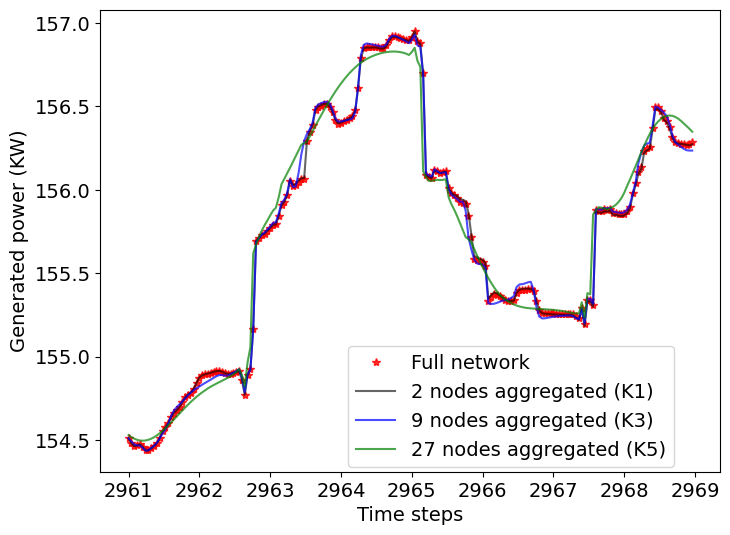

In [86]:
fig, ax = plt.subplots(figsize=(8,6))
i = 2900
e = 3100
ax.plot(pw_sources_in_step_tss['phys'][i:e]*1e-3, '*', c='red', alpha=0.8)
ax.plot(pw_sources_in_step_tss['a-rnn'][i:e]*1e-3, c='black', alpha=0.6)
# ax.plot(pw_sources_in_step_tss['b-rnn'][i:e]*1e-6, '+', c='black', alpha=0.6)
ax.plot(pw_sources_in_step_tss['d-rnn'][i:e]*1e-3, c='blue', alpha=0.7)
# ax.plot(pw_sources_in_step_tss['e-rnn'][i:e]*1e-6, '+', c='blue', alpha=0.6)
ax.plot(pw_sources_in_step_tss['f-rnn'][i:e]*1e-3, c='green', alpha=0.7)
set_my_layout(ax=ax, xlabel='Time steps', ylabel='Generated power (KW)', 
              set_legend=True,
              legend_loc=[1.01,0.01])
ax.legend(['Full network',
           '2 nodes aggregated (K1)',
        #    '4 nodes aggregated (K2)',
           '9 nodes aggregated (K3)',
        #    '12 nodes aggregated (K4)',
           '27 nodes aggregated (K5)'],
          prop={'size': 14},
          loc=[0.4,0.01])
ax.set_xticklabels(np.arange(i+60, e+60))
plt.savefig(os.path.join('ARTICLE_images_plots','Comparison_hybrids_power_generated_rnn.svg'))
plt.show()

C:\Users\d22rodri\AppData\Local\Temp\ipykernel_12224\1385362066.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([-1, 0, 2, 4, 9, 12, 27])


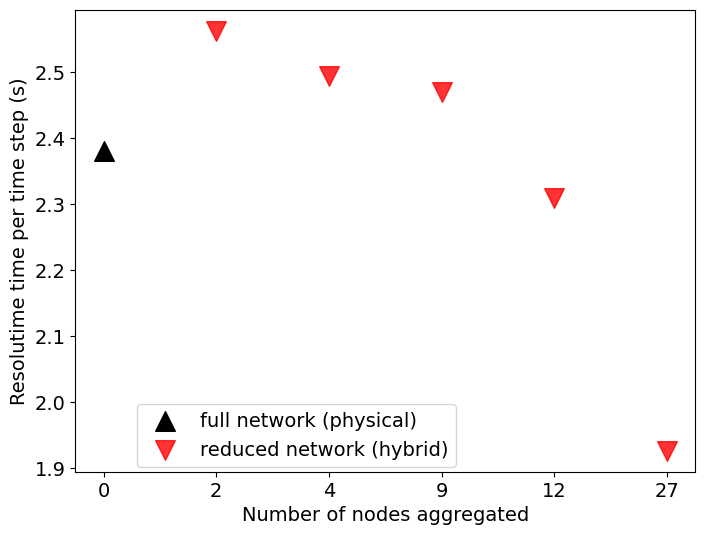

In [91]:
rnn_mean_inference_time = 0.01 # second # from Julia call (different from python 20 ms about)
cnn_mean_inference_time = 0.0098 # second # from Julia call (different from python 20 ms about)

physical_simulation_time_per_step = [  # From Julia
   2.38, # full
   1.963 + 0*60, # K1
   1.895 + 0*60, # K2
   1.87 + 0*60, # K3
   1.71 + 0*60, # K4
   1.326 + 0*60 # K5
]

physical_simulation_time_per_step_rnn = [  # From Julia
   2.38, # full
   1.963 + rnn_mean_inference_time*60, # K1
   1.895 + rnn_mean_inference_time*60, # K2
   1.87 + rnn_mean_inference_time*60, # K3
   1.71 + rnn_mean_inference_time*60, # K4
   1.326 + rnn_mean_inference_time*60 # K5
]

physical_simulation_time_per_step_cnn = [  # From Julia
   2.38, # full
   1.963 + cnn_mean_inference_time*60, # K1
   1.895 + cnn_mean_inference_time*60, # K2
   1.87 + cnn_mean_inference_time*60, # K3
   1.71 + cnn_mean_inference_time*60, # K4
   1.326 + cnn_mean_inference_time*60 # K5
]


fig, ax = plt.subplots(figsize=(8,6))
x_labels = np.arange(len(physical_simulation_time_per_step))
ax.scatter(x_labels[0], physical_simulation_time_per_step[0], marker='^', color='black', s=200, label='full network (physical)')
# ax.scatter(x_labels[1:], physical_simulation_time_per_step[1:], alpha=0.8, s=200, marker='v', label='reduced network (physical)', c='red')
ax.scatter(x_labels[1:], physical_simulation_time_per_step_rnn[1:], alpha=0.8, s=200, marker='v', label='reduced network (hybrid)', c='red')

# ax.scatter(range(len(physical_simulation_time_per_step)), physical_simulation_time_per_step_cnn, 
#            color=['black', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue'], alpha=0.8, s=200, marker='^', label='CNN')
# # ax.plot(physical_simulation_time_per_step[1:], '^', c='black', alpha=0.8, markersize=10)
# ax.set_xticks([0, 2, 4, 9, 12, 27])
axs = ax.get_xticks()
# ax.set_xticks(np.arange(0,axs[-1]))
ax.set_xticklabels([-1, 0, 2, 4, 9, 12, 27])

set_my_layout(ax=ax, xlabel='Number of nodes aggregated', ylabel='Resolutime time per time step (s)',
              set_legend=True)

ax.legend(['full network (physical)', 'reduced network (hybrid)'], prop={'size': 14},
          loc=[0.1,0.01])

plt.savefig(os.path.join('ARTICLE_images_plots', 'resolution_time_reduction.svg'))
plt.show()

In [75]:
axs

array([ 0,  2,  4,  9, 12, 27])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\d22rodri\AppData\Local\Temp\ipykernel_12224\3851271133.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(i, e))


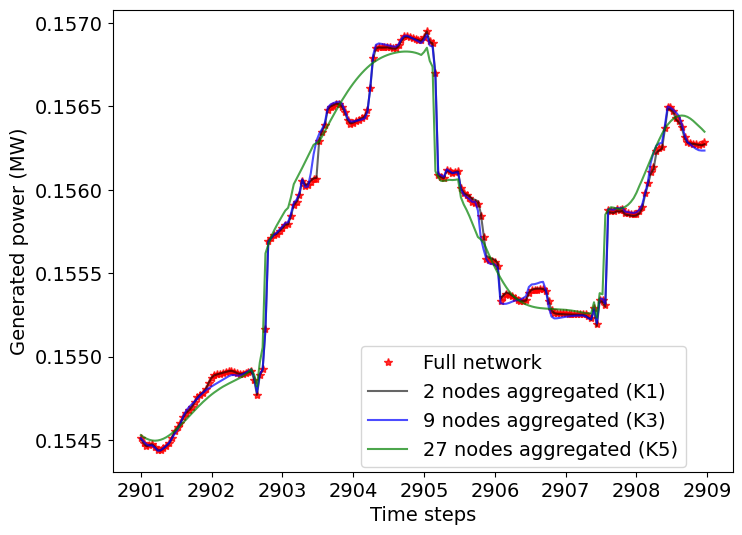

In [61]:
fig, ax = plt.subplots(figsize=(8,6))
i = 2900
e = 3100
ax.plot(pw_sources_in_step_tss['phys'][i:e]*1e-6, '*', c='red', alpha=0.8)
ax.plot(pw_sources_in_step_tss['a-rnn'][i:e]*1e-6, c='black', alpha=0.6)
# ax.plot(pw_sources_in_step_tss['b-rnn'][i:e]*1e-6, '+', c='black', alpha=0.6)
ax.plot(pw_sources_in_step_tss['d-rnn'][i:e]*1e-6, c='blue', alpha=0.7)
# ax.plot(pw_sources_in_step_tss['e-rnn'][i:e]*1e-6, '+', c='blue', alpha=0.6)
ax.plot(pw_sources_in_step_tss['f-rnn'][i:e]*1e-6, c='green', alpha=0.7)
set_my_layout(ax=ax, xlabel='Time steps', ylabel='Generated power (MW)', 
              set_legend=True,
              legend_loc=[1.01,0.01])
ax.legend(['Full network',
           '2 nodes aggregated (K1)',
        #    '4 nodes aggregated (K2)',
           '9 nodes aggregated (K3)',
        #    '12 nodes aggregated (K4)',
           '27 nodes aggregated (K5)'],
          prop={'size': 14},
          loc=[0.4,0.01])
ax.set_xticklabels(np.arange(i, e))
plt.savefig('Comparison_hybrids_power_generated_rnn.svg')
plt.show()